# Social bot for text analysis

#### Main aim is to detect fake and spam messages

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("spam.csv",encoding='cp1252')


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data Cleaning

In [5]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.sample(10)

,v1,v2
705,ham,I don't think I can get away for a trek that l...
859,ham,Did he just say somebody is named tampa
2328,ham,That day you asked about anand number. Why:-)
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
2946,ham,Leave it. U will always be ignorant.
814,spam,U were outbid by simonwatson5120 on the Shinco...
2289,spam,Had your mobile 11mths ? Update for FREE to Or...
785,ham,"She was supposed to be but couldn't make it, s..."
2563,ham,K..k..i'm also fine:)when will you complete th...
5310,ham,"yeah, that's what I was thinking"


In [7]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Convert ham & Spam into numerial no.:

In [9]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [10]:
df['target']= encoder.fit_transform(df['target'])

In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### To check missing values



In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Checking reductancy
df.duplicated().sum()

403

In [14]:
# removing reductancy to improve the readbility
df= df.drop_duplicates(keep="first")

In [15]:
#ensurning , no duplicates
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. EDA (exploratory data analysis)

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

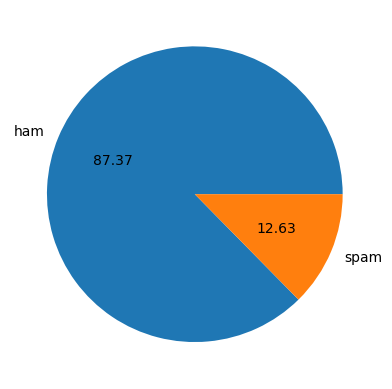

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct ='%0.2f')
plt.show()

#### data is embalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>


False

In [21]:
df['no_of_character'] = df['text'].apply(len)

C:\Users\admin\AppData\Local\Temp\ipykernel_10484\2164843212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_character'] = df['text'].apply(len)


In [22]:
df.head()

,target,text,no_of_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
### fetching no. of word
df['numWords'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\admin\AppData\Local\Temp\ipykernel_10484\4125433221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numWords'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df

,target,text,no_of_character,numWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\admin\AppData\Local\Temp\ipykernel_10484\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df

,target,text,no_of_character,numWords,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['no_of_character','numWords','num_sentences']].describe()

,no_of_character,numWords,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham messages
df[df['target'] == 0][['no_of_character','numWords','num_sentences']].describe()

,no_of_character,numWords,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam messages
df[df['target'] == 1][['no_of_character','numWords','num_sentences']].describe()

,no_of_character,numWords,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='no_of_character', ylabel='Count'>

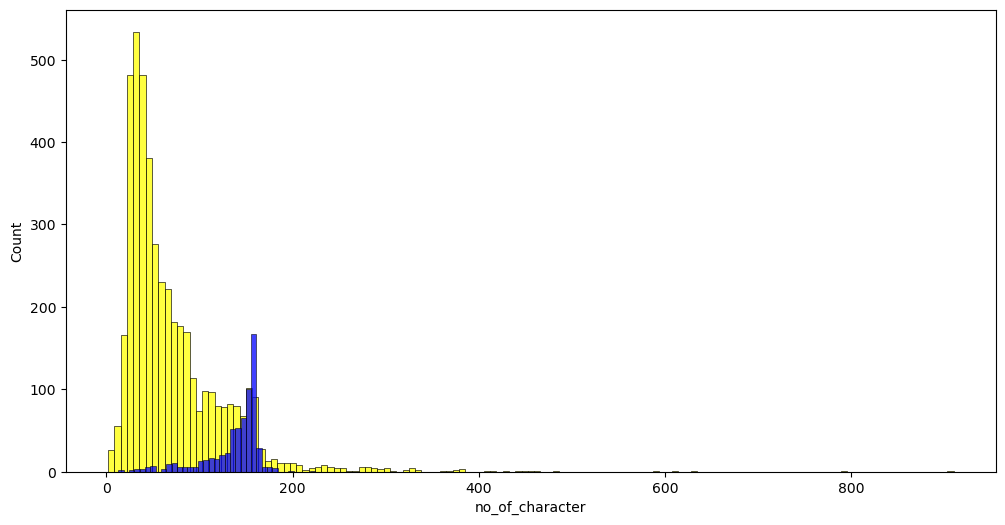

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_of_character'],color='yellow')
sns.histplot(df[df['target'] == 1]['no_of_character'],color='blue')

<Axes: xlabel='numWords', ylabel='Count'>

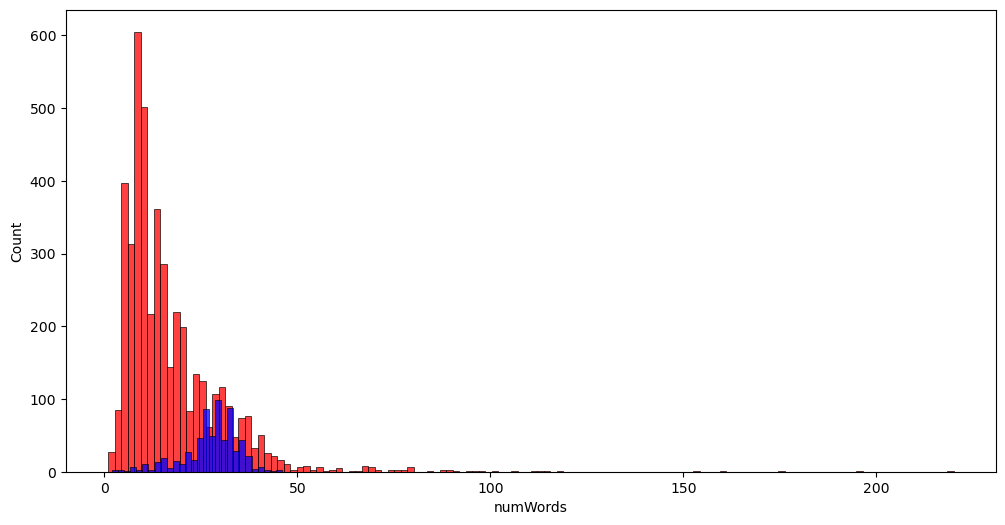

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['numWords'],color='red')
sns.histplot(df[df['target'] == 1]['numWords'],color='blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

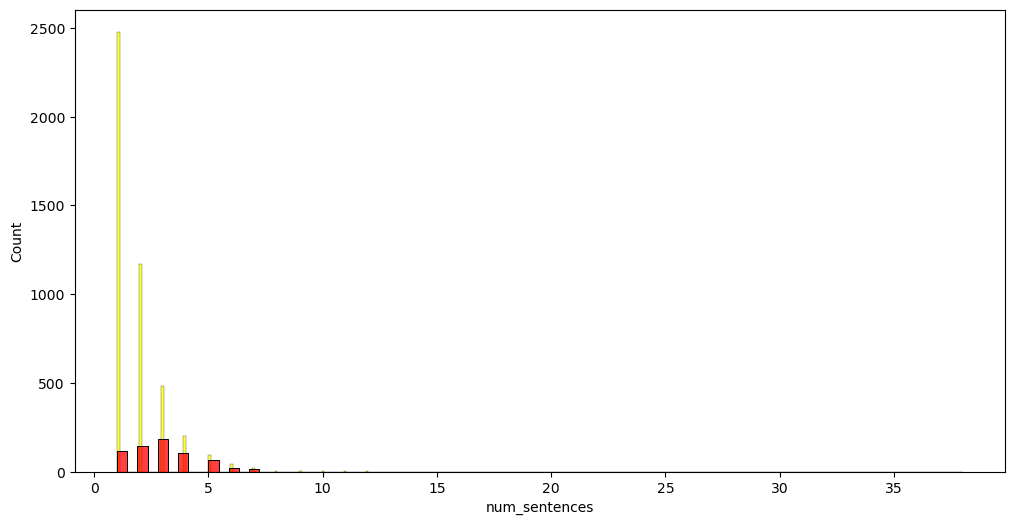

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'],color='yellow')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

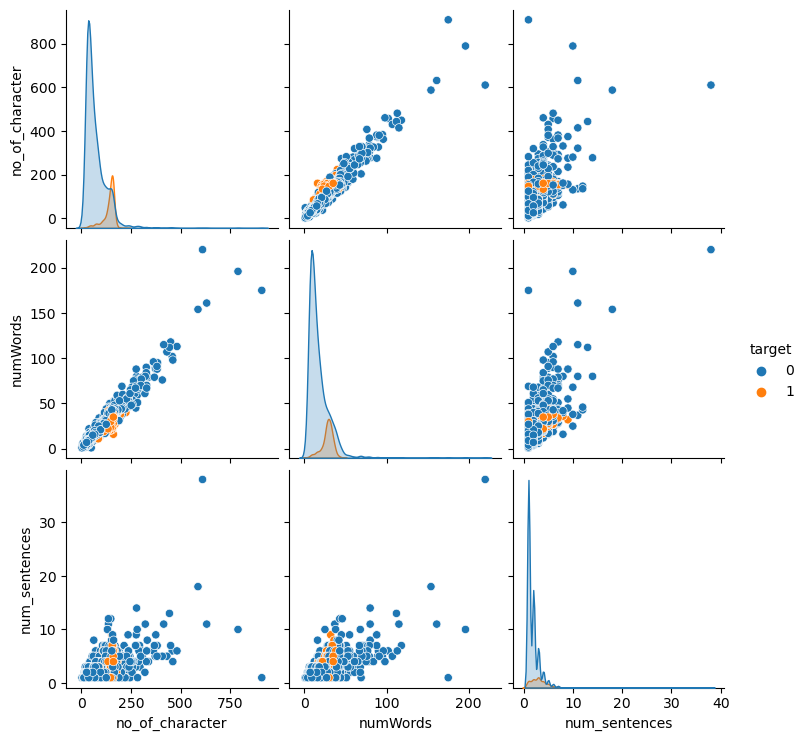

In [34]:
sns.pairplot(df,hue='target')

C:\Users\admin\AppData\Local\Temp\ipykernel_10484\1279228754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

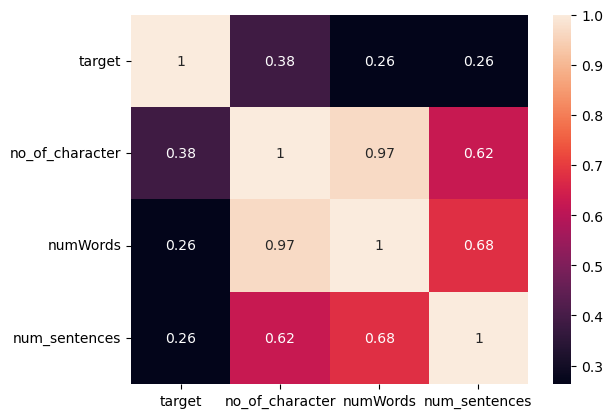

In [35]:
#correlation coefficient
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

*Lower case
*Tokenization
*Removing special cgaracters
*Removing stop words and punctuation
*Stemming

In [36]:
import nltk
import string

from nltk.corpus import stopwords


In [37]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
def transformText(text):
    
    #lowercase the text
    text = text.lower()
    
    #to tokenize 
    text = nltk.word_tokenize(text)
    
    #removing special char
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [39]:
transformText('I was playing ludo and I loved it. how about you?')

'playing ludo loved play ludo love'

In [40]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
df['transformedText'] = df['text'].apply(transformText)

C:\Users\admin\AppData\Local\Temp\ipykernel_10484\2042896081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformedText'] = df['text'].apply(transformText)


In [42]:
df.head()

,target,text,no_of_character,numWords,num_sentences,transformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [43]:
!pip install wordcloud


In [44]:

from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spamWc = wc.generate(df[df['target'] == 1] ['transformedText'].str.cat(sep=" "))

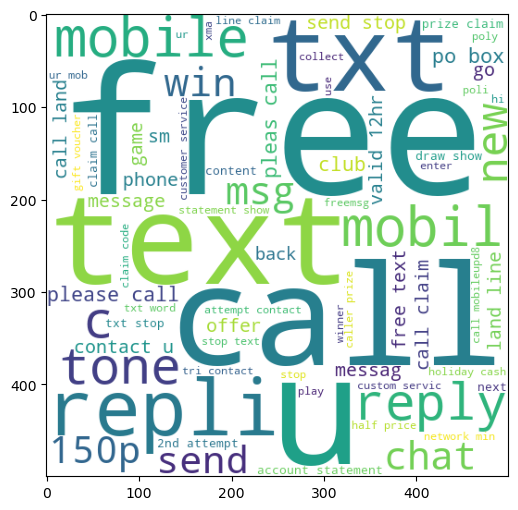

In [46]:
import matplotlib
#for bigger view
plt.figure(figsize =(15,6))
plt.imshow(spamWc)

In [47]:
hamWc = wc.generate(df[df['target'] == 0] ['transformedText'].str.cat(sep=" "))

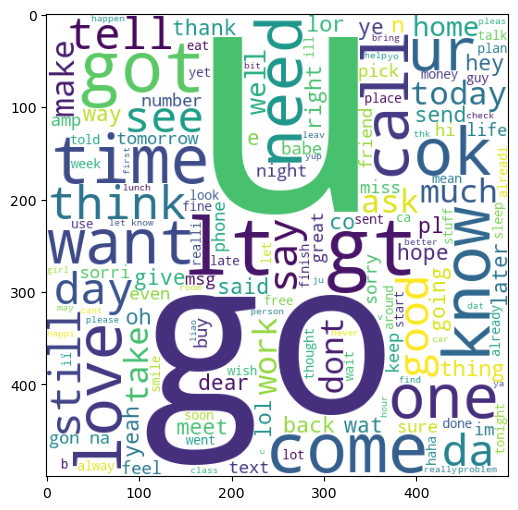

In [48]:
#for bigger view
plt.figure(figsize =(15,6))
plt.imshow(spamWc)

In [49]:
#let's see the top use word in spam messages
spamCorpus = []   #creating list
for msg in df[df['target']==1]['transformedText'].tolist():
    for words in msg.split():
        spamCorpus.append(words)
    

In [50]:
len(spamCorpus)

19878

In [51]:
#to count frequent use word
from collections import Counter
pd.DataFrame(Counter(spamCorpus).most_common(20))

,0,1
0,call,622
1,free,382
2,2,310
3,txt,271
4,u,238
5,ur,238
6,text,226
7,stop,208
8,claim,194
9,4,194


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'u'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'text'),
  Text(7, 0, 'stop'),
  Text(8, 0, 'claim'),
  Text(9, 0, '4'),
  Text(10, 0, 'prize'),
  Text(11, 0, 'get'),
  Text(12, 0, 'new'),
  Text(13, 0, 'send'),
  Text(14, 0, 'mobil'),
  Text(15, 0, 'urgent'),
  Text(16, 0, 'nokia'),
  Text(17, 0, 'contact'),
  Text(18, 0, 'mobile'),
  Text(19, 0, 'repli')])

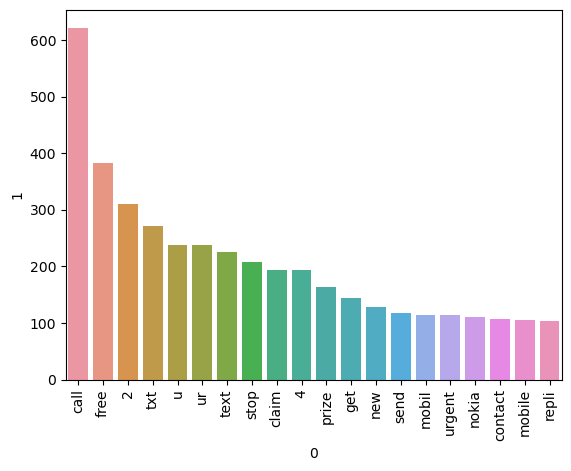

In [52]:
sns.barplot(x= pd.DataFrame(Counter(spamCorpus).most_common(20))[0],y = pd.DataFrame(Counter(spamCorpus).most_common(20))[1])
#to have a clearer view of words 
plt.xticks(rotation= 'vertical')

In [53]:
#let's see the top use word in ham messages
hamCorpus = []   #creating list
for msg in df[df['target']==0]['transformedText'].tolist():
    for words in msg.split():
        hamCorpus.append(words)
    

In [54]:
len(hamCorpus)

70808

In [55]:
#to count frequent use word
from collections import Counter
pd.DataFrame(Counter(hamCorpus).most_common(20))

,0,1
0,u,1766
1,go,644
2,get,642
3,gt,576
4,lt,574
5,2,568
6,come,486
7,got,472
8,know,461
9,like,455


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'ok'),
  Text(11, 0, 'good'),
  Text(12, 0, 'call'),
  Text(13, 0, 'time'),
  Text(14, 0, 'ur'),
  Text(15, 0, 'love'),
  Text(16, 0, 'want'),
  Text(17, 0, 'day'),
  Text(18, 0, 'one'),
  Text(19, 0, 'need')])

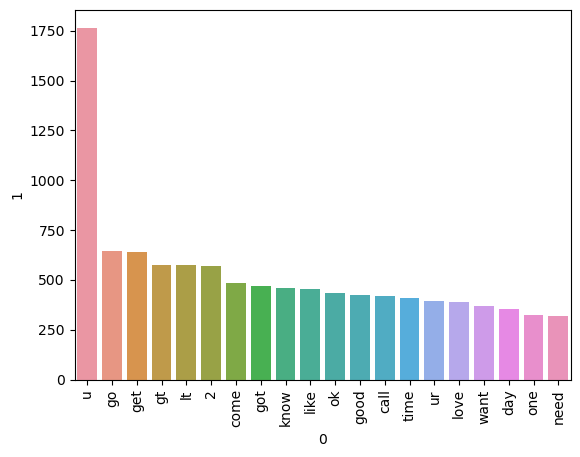

In [56]:
sns.barplot(x= pd.DataFrame(Counter(hamCorpus).most_common(20))[0],y = pd.DataFrame(Counter(hamCorpus).most_common(20))[1])
#to have a clearer view of words 
plt.xticks(rotation= 'vertical')

In [57]:
#now me will vectorize the text using bag of words

# 4. Model buliding

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [81]:
##let's use Tidf instead of bag of words in order to find a good precision score.
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [82]:
X= tfidf.fit_transform(df['transformedText']).toarray()

In [83]:
y = df['target'].values

In [84]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
#creating objects
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
#training the model
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


#### quite similar pecision score

In [90]:
#training the model
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


#### impressive 

In [91]:
#training the model
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


#### similar respose as previous 

## chose Tfidf ---> mnb

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [94]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBOT' : gbdt,
    'xgb' : xgb
}

In [95]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [96]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9748549323017408, 0.9745762711864406)

In [97]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9595959595959596
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9565217391304348
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8951612903225806
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBOT
Accuracy -  0.9477756286266924
Precision -  0.9468085106382979
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9565217391304348


In [98]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [99]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.974855,1.000000
5,RF,0.975822,0.982906
0,SVC,0.974855,0.974576
8,ETC,0.977756,0.967480
4,LR,0.954545,0.959596
6,AdaBoost,0.968085,0.956522
10,xgb,0.968085,0.956522
9,GBOT,0.947776,0.946809
7,BgC,0.961315,0.895161


In [100]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [101]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.974855
4,ETC,Accuracy,0.977756
5,LR,Accuracy,0.954545
6,AdaBoost,Accuracy,0.968085
7,xgb,Accuracy,0.968085
8,GBOT,Accuracy,0.947776
9,BgC,Accuracy,0.961315


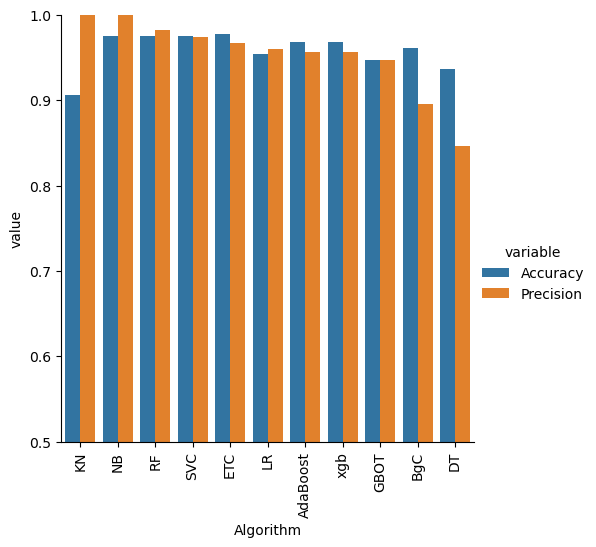

In [102]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model improve
#### 1. Change the max_features parameter of TfIdf

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [106]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [108]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
5,LR,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596
6,AdaBoost,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522
7,xgb,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522
8,GBOT,0.947776,0.946809,0.947776,0.946809,0.947776,0.946809,0.947776,0.946809
9,BgC,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161


In [109]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [111]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [113]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [114]:
from sklearn.ensemble import StackingClassifier

In [115]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [116]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [117]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))